<h1><center>HR Analytics</center></h1>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "svg"

In [2]:
df = pd.read_csv("./complete_data.csv")

In [3]:
df.head()

,id,first_name,last_name,birthdate,age,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,04-06-1991,31,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,20-01-2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,29-06-1984,38,Male,White,Business Development,Business Analyst,Headquarters,08-04-2019,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,29-07-1989,33,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,12-10-2010,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,14-09-1982,40,Female,White,Services,Service Tech,Headquarters,10-04-2005,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,11-04-1994,28,Female,Two or More Races,Product Management,Business Analyst,Remote,29-09-2010,2029-10-29 06:09:38 UTC,Flint,Michigan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22214 entries, 0 to 22213
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              22214 non-null  object
 1   first_name      22214 non-null  object
 2   last_name       22214 non-null  object
 3   birthdate       22214 non-null  object
 4   age             22214 non-null  int64 
 5   gender          22214 non-null  object
 6   race            22214 non-null  object
 7   department      22214 non-null  object
 8   jobtitle        22214 non-null  object
 9   location        22214 non-null  object
 10  hire_date       22214 non-null  object
 11  termdate        3929 non-null   object
 12  location_city   22214 non-null  object
 13  location_state  22214 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.4+ MB


In [5]:
df.describe()

,age
count,22214.000000
mean,38.428559
std,10.653415
min,20.000000
25%,29.000000
50%,38.000000
75%,48.000000
max,57.000000


In [6]:
df.isna().sum()

id                    0
first_name            0
last_name             0
birthdate             0
age                   0
gender                0
race                  0
department            0
jobtitle              0
location              0
hire_date             0
termdate          18285
location_city         0
location_state        0
dtype: int64

**Obvservations:**
1. We have got 18,825 N/A values in `termdate` column
2. All the other columns do not have any N/A values

## 2. Create 3 KPI’s that list the number of employees, percent of workers working remotely and in HQ and the average age.

In [7]:
assert len(df["id"].unique()) == len(df)

All the IDs are unique, we can use it to find the number of employees

In [8]:
print(f"Total No. Of Employees = {len(df)}")

Total No. Of Employees = 22214


Now we will look at the number of workers working Remote & HQ. This can be inferred by the `location` column.

In [9]:
df["location"].value_counts(normalize=True) * 100

location
Headquarters    75.245341
Remote          24.754659
Name: proportion, dtype: float64

1. *% of workers working in Headquarters* = **75.24%**
2. *% of workers working in Remote* = **24.75%**

Finally we look at the `age` column to find the average age

In [10]:
print(f"Average age = {df['age'].mean():.3f}")

Average age = 38.429


## 3. Create a Line chart showing the hiring rate By Year.

We will look at the `hiredate` column to first determine the number of people hired in a particluar year and then we can calculate the rate of hire from there.

In [11]:
df["hire_date"].dtype

dtype('O')

`hiredate` has a dtype of Object. Let's convert it into datetime so that we can deal with it better

In [12]:
df["hiredate"] = pd.to_datetime(
    df["hire_date"], dayfirst=True, format="%d-%m-%Y", exact=True
)

In [13]:
df = df.drop(columns=["hire_date"], axis=1)

In [14]:
df.head()

,id,first_name,last_name,birthdate,age,gender,race,department,jobtitle,location,termdate,location_city,location_state,hiredate
0,00-0037846,Kimmy,Walczynski,04-06-1991,31,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,NaN,Cleveland,Ohio,2002-01-20
1,00-0041533,Ignatius,Springett,29-06-1984,38,Male,White,Business Development,Business Analyst,Headquarters,NaN,Cleveland,Ohio,2019-04-08
2,00-0045747,Corbie,Bittlestone,29-07-1989,33,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,NaN,Cleveland,Ohio,2010-10-12
3,00-0055274,Baxy,Matton,14-09-1982,40,Female,White,Services,Service Tech,Headquarters,NaN,Cleveland,Ohio,2005-04-10
4,00-0076100,Terrell,Suff,11-04-1994,28,Female,Two or More Races,Product Management,Business Analyst,Remote,2029-10-29 06:09:38 UTC,Flint,Michigan,2010-09-29


Splitting it into `year`, `week` & `day`

In [15]:
df[["year", "week", "day"]] = df["hiredate"].dt.isocalendar()

In [16]:
df.head()

,id,first_name,last_name,birthdate,age,gender,race,department,jobtitle,location,termdate,location_city,location_state,hiredate,year,week,day
0,00-0037846,Kimmy,Walczynski,04-06-1991,31,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,NaN,Cleveland,Ohio,2002-01-20,2002,3,7
1,00-0041533,Ignatius,Springett,29-06-1984,38,Male,White,Business Development,Business Analyst,Headquarters,NaN,Cleveland,Ohio,2019-04-08,2019,15,1
2,00-0045747,Corbie,Bittlestone,29-07-1989,33,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,NaN,Cleveland,Ohio,2010-10-12,2010,41,2
3,00-0055274,Baxy,Matton,14-09-1982,40,Female,White,Services,Service Tech,Headquarters,NaN,Cleveland,Ohio,2005-04-10,2005,14,7
4,00-0076100,Terrell,Suff,11-04-1994,28,Female,Two or More Races,Product Management,Business Analyst,Remote,2029-10-29 06:09:38 UTC,Flint,Michigan,2010-09-29,2010,39,3


In [17]:
hire_df = (df[["year", "id"]].groupby(by="year").count() / len(df)) * 100
hire_df.rename(columns={"id": "hire-rate"}, inplace=True)

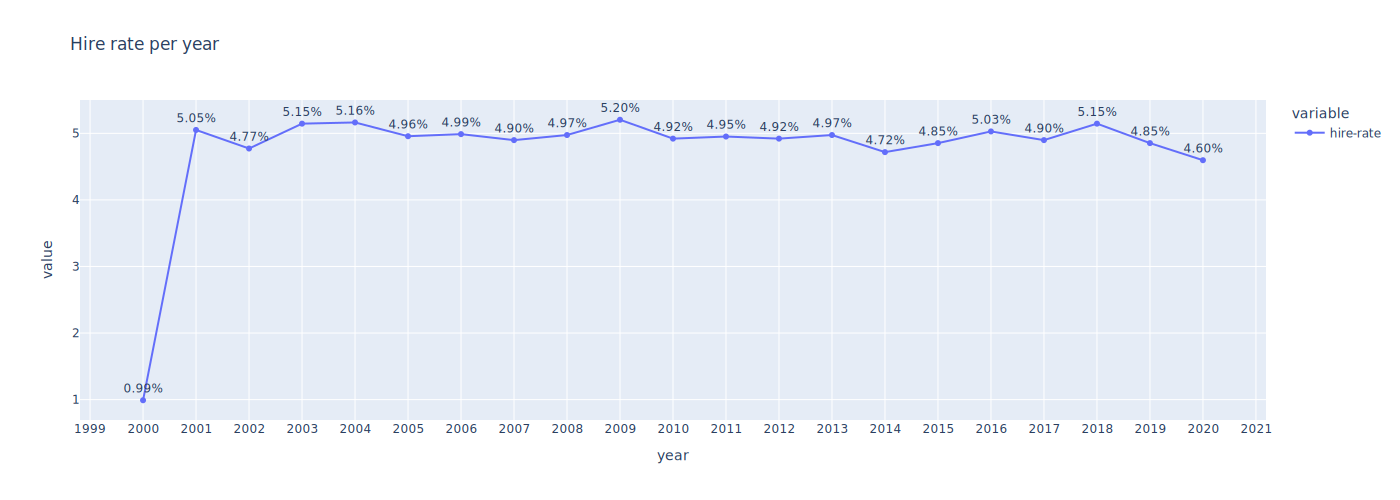

In [18]:
fig = px.line(
    data_frame=hire_df,
    markers=True,
    text=[f"{y:.2f}%" for y in hire_df["hire-rate"].values],
    title="Hire rate per year", width=1400, height=500
)
fig.update_traces(textposition="top center")

fig.update_xaxes(tickmode="linear", nticks=len(hire_df.index))

fig.show()

## 4. Create a Donut chart representing the gender of employees.

In [19]:
gen_df = df.gender.value_counts()
gen_df.values

array([11288, 10321,   605], dtype=int64)

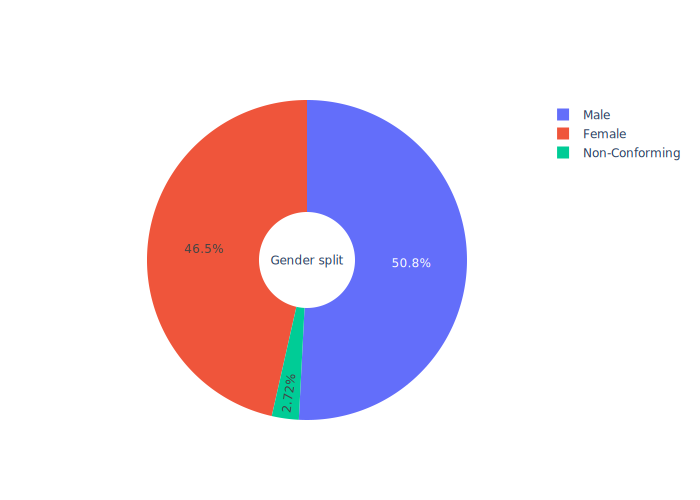

In [20]:
fig = go.Figure(
    data=[
        go.Pie(
            labels=gen_df.index.values,
            values=gen_df.values,
            hole=0.3,
            title="Gender split",
        )
    ]
)

fig.show()

## 5. Create 3 Bar charts showing employees By State, By Department & By Race. 

### 5.1 Employees by State

In [21]:
df["location_state"].unique()

array(['Ohio', 'Michigan', 'Pennsylvania', 'Wisconsin', 'Illinois',
       'Indiana', 'Kentucky'], dtype=object)

In [22]:
state_df = df["location_state"].value_counts()
state_df

location_state
Ohio            18025
Pennsylvania     1115
Illinois          868
Indiana           700
Michigan          673
Kentucky          451
Wisconsin         382
Name: count, dtype: int64

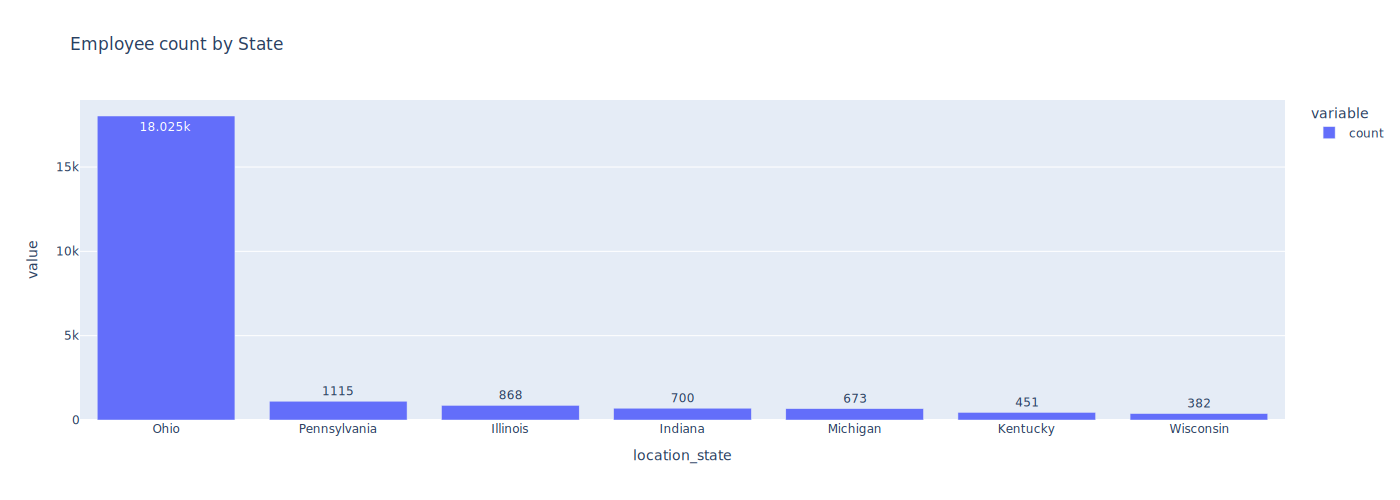

In [23]:
fig = px.bar(data_frame=state_df, title="Employee count by State", text_auto=True)
fig.update_layout(width=1400)
fig.show()

### 5.2 Employees by Department

In [24]:
dep_df = df["department"].value_counts()
dep_df

department
Engineering                 6686
Accounting                  3333
Sales                       1832
Human Resources             1807
Training                    1692
Services                    1686
Business Development        1642
Research and Development    1084
Support                      954
Product Management           641
Marketing                    494
Legal                        311
Auditing                      52
Name: count, dtype: int64

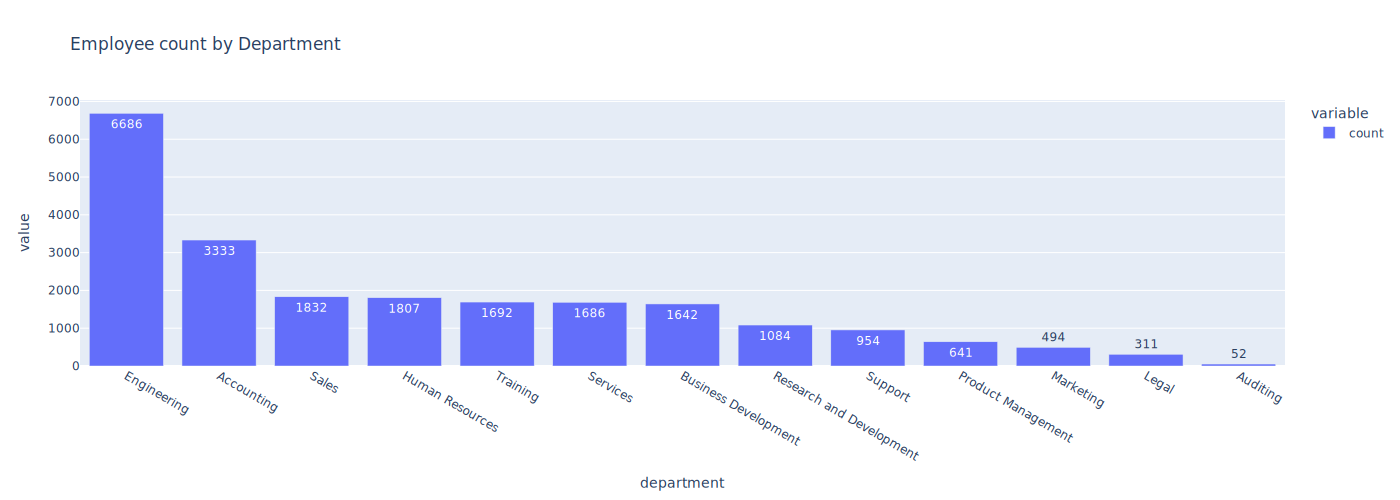

In [25]:
fig = px.bar(data_frame=dep_df, title="Employee count by Department", text_auto=True)
fig.update_layout(width=1400)
fig.show()

### 5.3 Employees by Race

In [26]:
race_df = df["race"].value_counts()
race_df

race
White                                        6328
Two or More Races                            3648
Black or African American                    3619
Asian                                        3562
Hispanic or Latino                           2501
American Indian or Alaska Native             1327
Native Hawaiian or Other Pacific Islander    1229
Name: count, dtype: int64

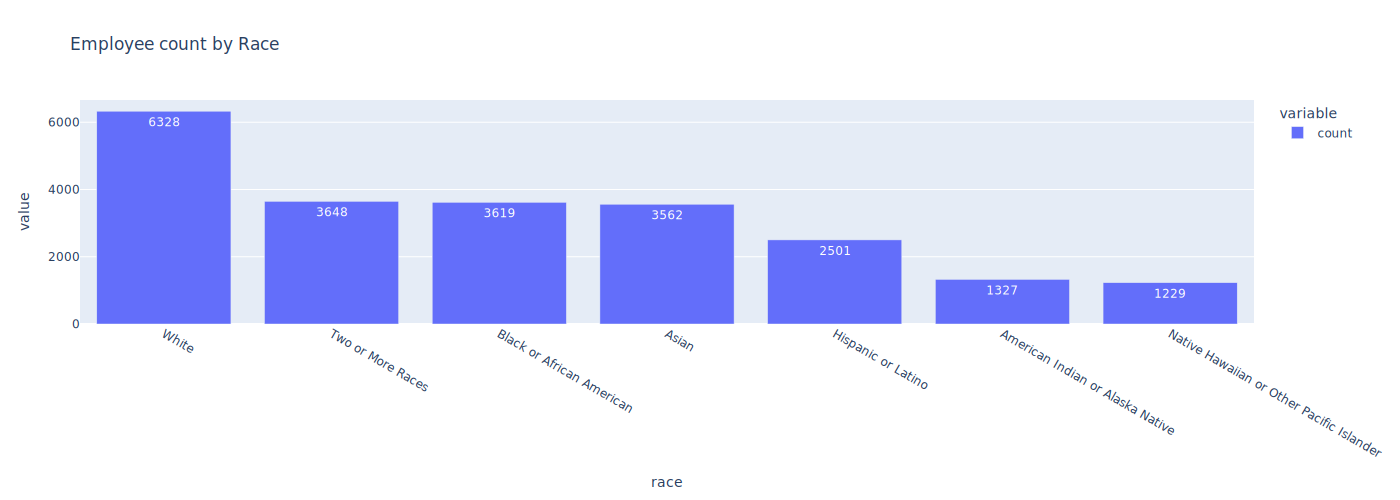

In [27]:
fig = px.bar(data_frame=race_df, title="Employee count by Race", text_auto=True)
fig.update_layout(width=1400)
fig.show()